## 결정트리(Decision Tree)  

Decision Tree는 분류와 회귀, 다중출력 작업도 가능한 알고리즘이다.  
또한, 이는 랜덤포레스트(Random Forest)의 구성요소, 다시말해 결정트리의 집합이 랜덤포레스트이다.  

## 1. 결정트리의 학습과 시각화  

iris 데이터 셋을 이용해 훈련을 시켜보자.   

In [76]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target # 종속변수, 종이름

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

`export_graphviz()`함수를 이용해서 결정트리의 그래프 정의를 iris_tree.dot 파일로 출력하여 훈련결과를 시각화 할 수 있다.  

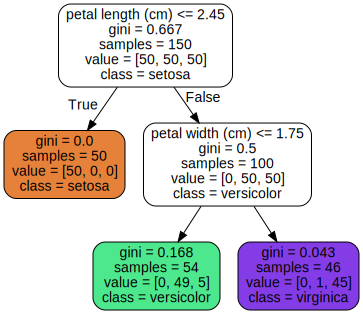

In [79]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(tree_clf,                             # 모델
               out_file= "iris_tree1.dot",  # 저장경로 설정
               feature_names=iris.feature_names[2:],   # 변수명
               class_names=iris.target_names,         # 종속변수
               rounded = True,
               filled = True)

Source.from_file("iris_tree1.dot")

png 파일로 내보내기 위해서는 커맨드 창에 다음 명령을 주면 된다.  
`$ dot -Tpng iris_tree1.dot -o iris_tree.png`  
이 경우에 커맨드 창에서 `.dot`파일이 저장된 경로로 이동 후 수행해야 한다.  

용어  
- 루트 노드(root node) : 맨 꼭대기의 노드  
- 부모 노드(parent node) : 자식노드를 가지는 노드  
- 자식 노드(child node) : 부모가 있는 노드  
- 리프 노드(leaf node) : 자식을 가지지 않는 노드  

## 2. 예측하기  

위의 그림을 보면 결정트리 분류기(DecisionTreeClassifier)를 사용한 결과로, 변수로 사용한 꽃잎 길이(petal length)와 꽃잎 너비(petal width)의 조건에 따라 분류해 주었다.  

그림에 나온 예측 변수들은 다음과 같다.  
- sample : 적용된 훈렴샘플 수  
- value : 각 범주(target)에 존재하는 훈련 샘플의 수, 모두 더하면 sample수와 같다.  
- gini : 불순도(impurity) 측정  

> gini에 대한 추가설명  
> 한 노드의 샘플이 모두 같은 범주라면(정확하게 분류) gini지수 = 0(깨끗)  
> 즉, 높을수록 불순도가 높다는 의미  




![png](/assets/images/ML/chap5/gini.png){: .align-center}{: width="80%" height="80%"}

- Pi는 i번째 노드에 있는 훈련 샘플 중 범주k에 속한 샘플의 비율이다.  
(예를들어, 깊이 2의 왼쪽 노드의 gini점수는 1-(0/54)^2-(49/54)^2-(5/54)^2 = 0.168 이다)  

> 사이킷런은 이진트리만 만드는 CART알고리즘을 사용  

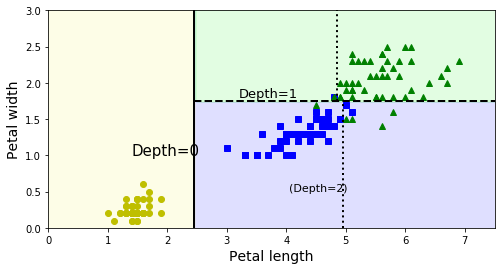

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

위 그림은 이 결정트리의 결정경계를 보여준다.  
굵은선을 기준으로 왼쪽(노란색)영역은 순수 노드(Setosa)만 있기 때문에 더이상 나눌 필요가 없다.  
하지만 오른쪽 영역은 순수노드가 아니므로(versicolor, virginica) 다시 꽃잎 너비(Petal_width)변수에 의해 나누어 진다.  
그리고 `max_depth = 2`로 설정했기 때문에 더이상 분할되지 않는다.  

꽃잎 길이(Petal length)변수의 4.85, 4.95값의 점선은 `max_depth=3`으로 설정했을때 나눠지는 가상의 선이다.(그냥 그린 것)  

## 3. 클래스(범주)의 확률 추정  

클래스의 확률 추정이란, 어떤 샘플이 특정 클래스 k에 속할 확률을 추정하는 것으로 과정은 다음과 같다.  

1. 특정 샘플이 속하는 리프노드 탐색  
2. 해당 노드의 훈련샘플과 클래스k의 비율 반환  
3. 높은 확률을 가진 클래스를 출력  

In [65]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [60]:
tree_clf.predict([[5, 1.5]])

array([1])

위와 같이 예를들어 길이 5, 너비 1.5인 샘플을 예측해본다고하면, 깊이 2의 왼쪽 리프노드로 향하게 되고  
각 확률을 본 뒤에 가장 높은 확률을 가지는 클래스로 들어간다.  

## 4. CART 훈련 알고리즘  

사이킷런은 결정 트리를 훈련시키기 위해, CART(Classification And Regression Tree)알고리즘을 사용한다.  
아이디어는 다음과 같다.  

1. 먼저 하나의 변수k의 임계값 tk를 사용해 가장 순수한(불순도가 낮은) 두 서브셋으로 나눈다.  
2. 같은 방식으로 서브셋을 또 나누기 위한 변수k와 임계값 tk를 찾는 과정을 반복  
3. `max_depth`가 되거나, 불순도를 더이상 줄이는 분할을 찾을 수 없다면 중단  

- CART 비용함수  

![png](/assets/images/ML/chap5/cart_cost_func.png){: .align-center}{: width="80%" height="80%"}

## 5. 계산 복잡도  

결정 트리의 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 변수의 수와 무관하게 log2(m)개의 노드를 거쳐야 한다.  
(m은 훈련데이터 수)  

또한 훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 변수를 비교하므로, 훈련 복잡도는 n*m*log(m)이 된다.  
훈련 데이터 셋이 적을 경우 `presort=True`를 지정하면 미리 데이터를 정렬하여 속도를 개선할 수 있다.  

## 6. 지니 불순도와 엔트로피  

- DecisionTreeClassifierd의 default매개변수는 gini  
- DescisionTreeRegressor의 default매개변수는 mse  

하지만 앞에서 계속 사용한 gini 불순도말고 엔트로피(entropy)로 지정하여 사용할 수 있다.  

![png](/assets/images/ML/chap5/entropy.png){: .align-center}{: width="80%" height="80%"}

엔트로피(entropy) 불순도도 마찬가지로 순수한 샘플만이 존재할때 0이된다.  
예를들어 첫 그림의 깊이 2의 왼쪽 노드의 엔트로피는  
-(49/54)log2(49/54)-(5/54)log2(5/54) = 0.445이다.  

차이점은  
- 지니불순도 : 가장 빈도 높은 클래스를 먼저 분할하고 나머지를 고립시키는 경향  
- 엔트로피 : 균형잡힌 트리를 만듬  

## 7. 규제 매개변수  

결정트리는 훈련 데이터에 대한 제약사항이 거의 없기 때문에, 규제를 주지 않으면 과대적합되기 쉽다.  
- `max_depth` : default는 `None`으로 최대 깊이까지 학습해, 과대적합 가능성이 있으므로 제한을 주면 좋다.  
- `min_samples_split` : 분할되기 위해 노드가 가져야하는 최소 샘플 수  
- `min_samples_leaf` : 리프 노드가 가져야할 최소 샘플 수  
- `min_weight_fraction_leaf` : `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율  
- `max_leaf_nodes` : 리프 노드의 최대 수  
- `max_features` : 각 노드에서 분할에 사용할 변수의 최대 수  
    
    
이렇게 min파라미터를 증가시키거나, max파라미터를 감소시키면 규제를 많이 줄 수 있다.  

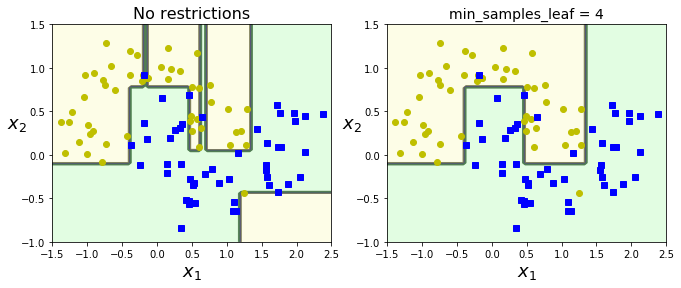

In [69]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

위는 moons데이터셋에 하나는 default, 하나는 `min_samples_leaf=4`라는 규제를 주어 훈련시킨 결과이다.  
리프 노드의 최소 샘플이 4개 이상이어야 하니, 과대적합을 피하고 좀 더 일반화가 가능해진 것을 볼 수 있다.  

> 규제를 주지 않고 우선 결정트리를 훈련시키고 불필요한 노드를 가지치기(pruning)하는 알고리즘이 있다(사이킷런에서는 사전에 미리 제한하는 pre-pruning만 지원).  
> 자세한 내용은 추후에 포스팅한다.  

## 8. 회귀(Regression)  

이번에는 사이킷런의 `DecisionTreeRegressor`을 이용해 노이즈가 섞인 2차함수 형태의 데이터셋에서 회귀트리를 만들어보자.  

In [91]:
# 2차함수 + noise 추가 
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)            # 0~1사이 난수 생성 (200행1열)
y = 4 * (X - 0.5) ** 2              # 임의의 2차함수 생성
y = y + np.random.randn(m, 1) / 10  # 노이즈 추가

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

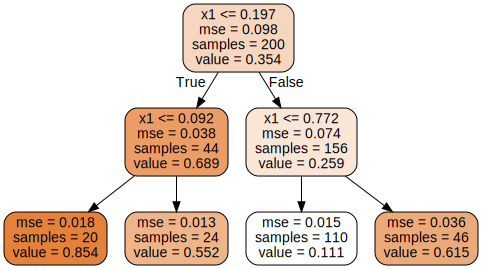

In [139]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(tree_reg,                              # 모델
               out_file= "regression.dot",             # 저장경로 설정
               feature_names=["x1"],                   # 변수명
               rounded = True,                         # 시각화(둥근네모)
               filled = True)                          # 시각화(도형채우기)

Source.from_file("regression.dot")

앞서 공부한 분류문제와의 차이는 각 노드에서 클래스(범주)를 예측하는 것이 아니라, 어떤 값(value)을 예측한다는 것이다.  
예를들어 x1 = 0.6인 샘플의 y값을 예측한다고 가정하면, 루트노드부터 시작해 3번째 리프노드(value=0.111)에 도달한다.  


이 리프노드에 있는 110개의 훈련 샘플의 평균 타깃값(y)이 예측값이 된다(분류문제와 비슷하게, 각 조건(여기서는 4개의 조건)에 해당하는 리프노드의 value값들로 예측되게 하는 것이다).  
이 샘플 110개에 대한 평균제곱오차(mse)를 계산하면 0.015가 된다.  

In [103]:
tree_reg.predict([[0.6]])

array([0.11063973])

이 예측에 대한 결과를 시각적으로 표현해보자.  

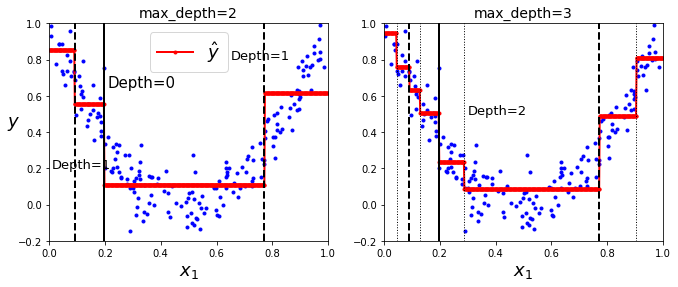

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)            # test 샘플
    y_pred = tree_reg.predict(x1)   # 적합
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [135]:
X[X < 0.197].mean()

0.10119149791133175

위 그림은 `max_depth`를 2와 3으로 설정했을때의 결과이다.  
X1은 `rand`로 0~1값이며, 각 점들은 sample, 빨간선은 예측값(적합값)을 의미한다.  
각 영역의 예측값은 항상 그 영역에 있는 타깃값(실제값)의 평균이 된다.  
그럼 `max_depth`를 주지 않으면 어떨까?  

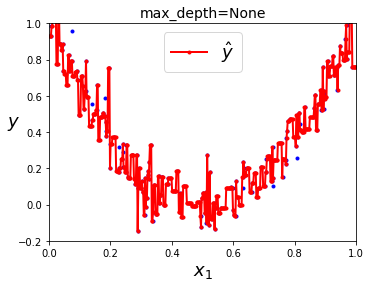

In [156]:
from sklearn.tree import DecisionTreeRegressor

tree_reg3 = DecisionTreeRegressor(random_state=42)
tree_reg3.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
plt.figure(figsize=(5.5, 4))
plot_regression_predictions(tree_reg3, X, y)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=None", fontsize=14)

plt.show()

거의 모든 점이 훈련데이터에 완벽하게 훈련(과대적합)된 결과를 초래한다.  

회귀문제에서 CART알고리즘은 앞에서 설명한것과 마찬가지로 불순도 대신 MSE를 최소화 하도록 분할 한다.  

![jpg](/assets/images/ML/chap5/regression.jpg){: .align-center}{: width="80%" height="80%"}
출처 : https://zhuanlan.zhihu.com/p/64754707

## 9. 불안정성  

결정트리의 단점은 계단모양(축에 수직인)의 결정경계를 만든다는 것이다. 따라서 훈련 데이터셋의 회전에 굉장히 민감하게 반응한다.  
회전이란, 다음의 예를 보자.  

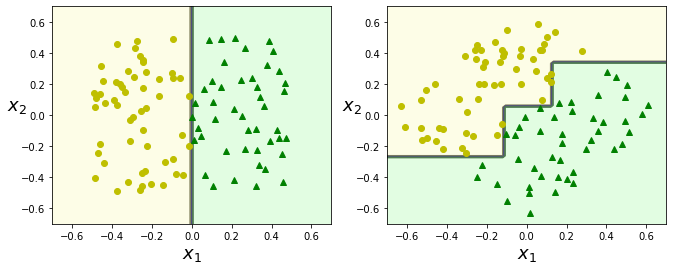

In [169]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7 0.7, -0.7, 0.7], iris=False)

plt.show()

왼쪽 그림은 결정트리가 쉽게 데이터셋을 구분하지만, 45도 회전한 데이터셋에 대해서는 구불구불하게 구분한 것을 볼 수 있다.  
둘다 훈련 데이터셋을 완벽하게 학습하지만, 오른쪽 모델은 일반화가 어려워 보인다.  

또한 결정트리의 가장 큰 문제는 훈련 데이터 셋의 작은 변화에도 매우 민감하다는 것인데, 훈련 데이터 셋에서 Versicolor 중 가장 넓은 데이터를 제거하고 훈련시켜보자.  

In [175]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [212]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장넓은(max petal width) versicolor

array([[4.8, 1.8]])

In [213]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

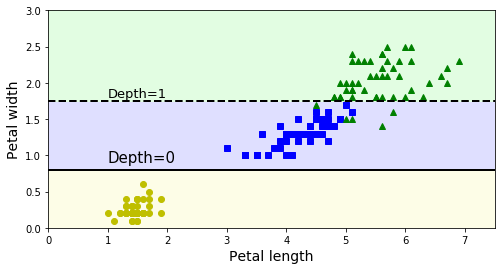

In [214]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

한개의 데이터셋만 제거했을뿐인데, 굉장히 다른 결과를 반환한다.  
이러한 불안정성 극복을 위해 랜덤포레스트(RandomForest)는 많은 결정트리에서 만든 예측을 평균하는 방법을 사용한다.  
이는 다음 포스팅에서 알아보자.  